Accuracy of Naive Bayes model: 1.0
                                            product_name  product_price Rate  \
0      SportSoul Cotton Gym & Athletic Abdomen Suppor...          249.0    1   
1      BAJAJ 15 L Storage Water Geyser (Popular Plus ...         5499.0    5   
2      Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0    1   
3      cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0    5   
4            Men Regular Fit Black Cotton Blend Trousers          409.0    5   
...                                                  ...            ...  ...   
62631  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0    3   
62632  boAt Wave Neo with 1.69 inch , 2.5D Curved Dis...         1699.0    2   
62633  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0    4   
62634  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...         8499.0    5   
62635  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0    4   

    

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


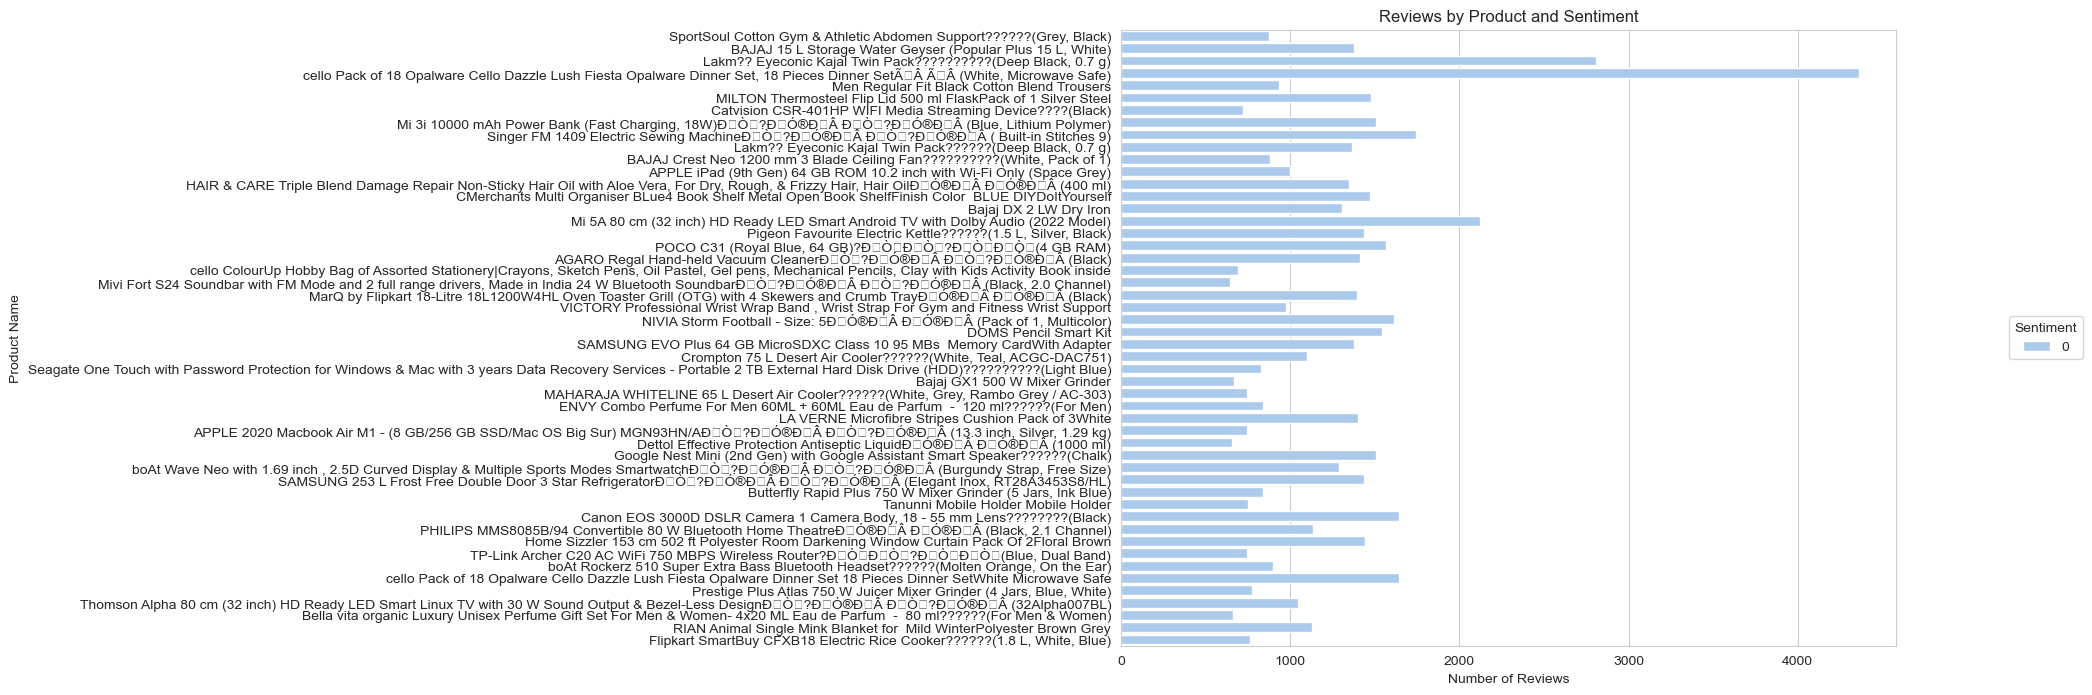

In [1]:
#using naive bays model for sentiment analysis ...

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['Review'] = df['Review'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Assign labels to sentiments (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Add sentiment polarity scores using VADER
sid = SentimentIntensityAnalyzer()
df['Sentiment_Polarity'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Get the top 50 products based on the number of reviews
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# Create a new dataframe with only the top products
df_top_products = df[df['product_name'].isin(top_products)]

# Shuffle the rows of the dataframe
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)

# Convert the product_price column to numeric
df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')

# Define a function to calculate the sentiment polarity of a review
def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply the function to the Review column to get the sentiment polarity of each review
df_top_products['Sentiment_Polarity'] = df_top_products['Review'].apply(get_sentiment_polarity)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_top_products['Review'], df_top_products['Sentiment'], test_size=0.2)

# Create a count vectorizer object and fit it to the training data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train a Naive Bayes model on the vectorized data
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Use the trained model to predict sentiment on the test data
X_test_vectorized = vectorizer.transform(X_test)
y_pred = nb_model.predict(X_test_vectorized)

# Calculate accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes model:", accuracy)

# Print the resulting dataframe
print(df_top_products)

# Create a grouped bar chart
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(10, 8))
sns.countplot(y="product_name", hue="Sentiment", data=df_top_products)
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.title("Reviews by Product and Sentiment")
plt.legend(title="Sentiment", loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.show()
